In [15]:
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
%matplotlib inline

In [16]:
sns.set(style="whitegrid")
color_palette = ['Red', 'Black', 'Blue']
figsize=(12,6)

In [17]:
dataset_name = '13129_0.5_0.003'
#dataset_name = 'set0'

opt_prefixes = ['c_', 'h_', 'f_']

for opt in opt_prefixes:
    exec(opt + 'tsdf = pd.read_csv(' + '"../runs/' + opt + dataset_name + '/timeslot_data.csv' + '")' )
    exec(opt + 'sfcdf = pd.read_csv(' + '"../runs/' + opt + dataset_name + '/sfc_data.csv' + '")' )

In [18]:
c_tsdf.head()

,timeslot,carbon_footprint,brown_energy,green_energy,acceptance_ratio,migration_count,ps_min,ps_5th,ps_mean,ps_95th,ps_max
0,0,0.000,0.000,0.000,100.0,0,13.0,13.0,17.142857,22.35,23.0
1,1,31.494,26.889,47.410,100.0,0,14.0,14.0,16.250000,19.00,19.0
2,2,34.974,29.715,52.853,100.0,0,15.0,15.0,18.125000,21.65,22.0
3,3,44.470,38.840,53.546,100.0,0,16.0,16.7,19.733333,21.90,24.0
4,4,68.110,60.433,67.956,100.0,0,14.0,14.5,18.181818,22.50,23.0


In [19]:
h_tsdf.head()

,timeslot,carbon_footprint,brown_energy,green_energy,acceptance_ratio,migration_count,ps_min,ps_5th,ps_mean,ps_95th,ps_max
0,0,0.000,0.000,0.000,100.0,0,13.0,13.00,16.714286,23.70,25.0
1,1,38.388,31.813,30.680,100.0,0,14.0,14.70,18.375000,21.30,22.0
2,2,49.831,40.302,30.428,100.0,0,13.0,14.05,18.375000,23.25,25.0
3,3,64.307,54.039,30.196,100.0,0,15.0,15.70,21.533333,25.30,26.0
4,4,106.959,90.523,34.482,100.0,0,16.0,16.00,19.000000,24.00,25.0


In [20]:
f_tsdf.head()

,timeslot,carbon_footprint,brown_energy,green_energy,acceptance_ratio,migration_count,ps_min,ps_5th,ps_mean,ps_95th,ps_max
0,0,0.000,0.000,0.000,100.0,0,13.0,13.0,16.000000,20.00,20.0
1,1,39.081,32.308,29.385,100.0,0,14.0,14.0,15.875000,18.65,19.0
2,2,52.053,41.957,26.764,100.0,0,13.0,13.7,16.500000,19.65,20.0
3,3,67.134,56.194,25.613,100.0,0,15.0,15.0,17.733333,20.00,20.0
4,4,113.349,95.657,23.904,100.0,0,14.0,14.0,16.636364,19.50,20.0


In [21]:
cf_df = c_tsdf[['timeslot', 'carbon_footprint']]
cf_df.columns = ['Timeslot', 'Optimal']
cf_df.loc[:,'Tabu Search'] = h_tsdf['carbon_footprint']
cf_df.loc[:,'Baseline'] = f_tsdf['carbon_footprint']

In [22]:
cf_df.head()

,Timeslot,Optimal,Tabu Search,Baseline
0,0,0.000,0.000,0.000
1,1,31.494,38.388,39.081
2,2,34.974,49.831,52.053
3,3,44.470,64.307,67.134
4,4,68.110,106.959,113.349


In [23]:
ts_melt = cf_df.melt(id_vars='Timeslot', var_name="Optimizer", value_name="Carbon Footprint")
mask = ((ts_melt['Timeslot'] <= 24) & (ts_melt['Timeslot'] > 0))
ts_melt = ts_melt[mask]
ts_melt.head()

,Timeslot,Optimizer,Carbon Footprint
1,1,Optimal,31.494
2,2,Optimal,34.974
3,3,Optimal,44.470
4,4,Optimal,68.110
5,5,Optimal,57.817


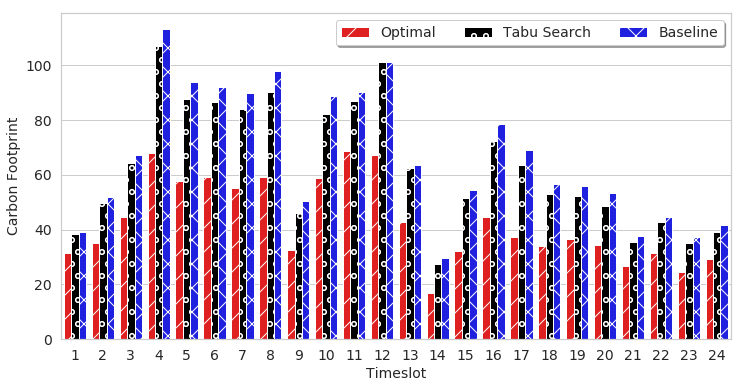

In [24]:
plt.figure(figsize=figsize)

SMALL_SIZE = 14
MEDIUM_SIZE = 14
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

bars = sns.barplot(x="Timeslot", y="Carbon Footprint", hue="Optimizer", data=ts_melt, 
            palette=color_palette)

num_locations = len(ts_melt['Timeslot'].unique())
hatches = itertools.cycle(['/', 'o', 'x', 'x', '\\', '*', 'o', 'O', '.'])
for i, bar in enumerate(bars.patches):
    if i % num_locations == 0:
        hatch = next(hatches)
    bar.set_hatch(hatch)
plt.legend(loc='upper right', fancybox=True, shadow=True, ncol=3)

In [25]:
gn_df = c_tsdf[['timeslot', 'green_energy']]
gn_df.columns = ['Timeslot', 'Optimal']
gn_df.loc[:,'Tabu Search'] = h_tsdf['green_energy']
gn_df.loc[:,'Baseline'] = f_tsdf['green_energy']

In [26]:
gn_df.head()

,Timeslot,Optimal,Tabu Search,Baseline
0,0,0.000,0.000,0.000
1,1,47.410,30.680,29.385
2,2,52.853,30.428,26.764
3,3,53.546,30.196,25.613
4,4,67.956,34.482,23.904


In [27]:
gn_melt = gn_df.melt(id_vars='Timeslot', var_name="Optimizer", value_name="Green Energy")
mask = ((gn_melt['Timeslot'] <= 24) & (gn_melt['Timeslot'] > 0))
gn_melt = gn_melt[mask]
gn_melt.head()

,Timeslot,Optimizer,Green Energy
1,1,Optimal,47.410
2,2,Optimal,52.853
3,3,Optimal,53.546
4,4,Optimal,67.956
5,5,Optimal,57.699


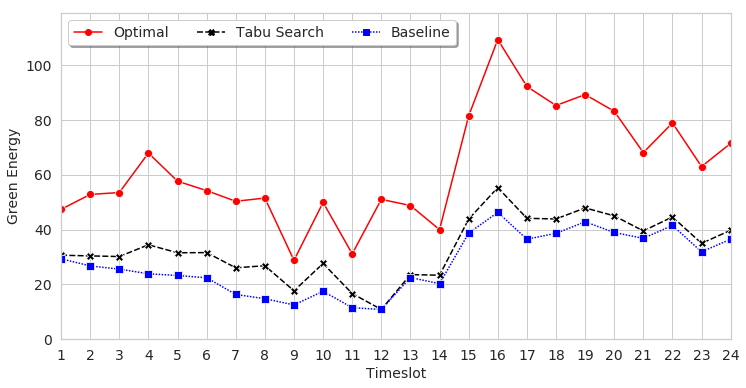

In [28]:
fig, ax = plt.subplots(figsize=figsize)
g = sns.lineplot(x='Timeslot', y='Green Energy', hue='Optimizer', data=gn_melt, ax=ax, 
                 style="Optimizer", markers=True, palette=color_palette, markersize=8)

g.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.xlim(1, 24)
plt.ylim(0, 119)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:], loc='upper left', fancybox=True, shadow=True, ncol=3)
#plt.savefig('lineplot.pdf')